# Proyek Analisis Data: Bike-Sharing dataset
- Nama: Muhamad Luthfi Farid Sidik
- Email: m.luthfifarid@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Hari apa saja pengguna menggunakan bike-sharing?
- Pada cuaca seperti apa pengguna biasanya menggunakan bike-sharing?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
cyclist_df = pd.read_csv("https://raw.githubusercontent.com/mluthfifrd/analisis-data/master/day.csv")
cyclist_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Hasil assessing data menunjukan bahwa tidak adanya missing value pada dataset bike-sharing karena angka pada jumlah RangIndex dan Non-Null Count sama, namun terdapat kesalahan tipe data pada kolom dteday dimana tipe data saat ini adalah object, seharusnya datetime.

In [ ]:
print("Jumlah duplikasi: ", cyclist_df.duplicated().sum())

Jumlah duplikasi:  0


Setelah dilakukan cek duplikasi, menunjukan bahwa tidak adanya duplikasi pada dataset bike-sharing.

In [ ]:
cyclist_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  cyclist_df[column] = pd.to_datetime(cyclist_df[column])

cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Hasil dari cleaning data yaitu merubah tipe data pada kolom dteday yang awalnya object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explorasi Data Bike-Sharing

In [ ]:
cyclist_df.describe(include="all")

<ipython-input-7-7d462871f9dd>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cyclist_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [ ]:
cyclist_df.groupby(by="workingday").instant.count()

workingday
0    231
1    500
Name: instant, dtype: int64

In [ ]:
cyclist_df.groupby(by="weathersit").instant.count()

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Hari apa saja pengguna menggunakan bike-sharing?

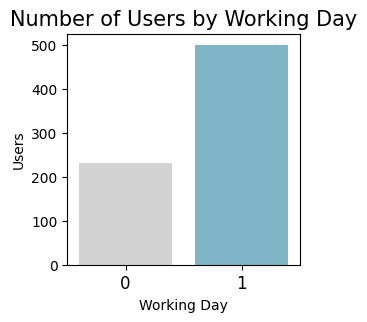

In [ ]:
byworkingday_df = cyclist_df.groupby(by="workingday").instant.nunique().reset_index()

plt.figure(figsize=(3, 3))
colors = ["#D3D3D3", "#72BCD4"]

sns.barplot(
    y="instant",
    x="workingday",
    data=byworkingday_df.sort_values(by="instant", ascending=False),
    palette=colors
)
plt.title("Number of Users by Working Day", loc="center", fontsize=15)
plt.ylabel("Users")
plt.xlabel("Working Day")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan dokumentasi dari https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset, angka 1 menunjukan hari kerja atau weekday, dan 0 merupakan weekend serta hari libur.

### Pertanyaan 2:

Pada cuaca seperti apa pengguna biasanya menggunakan bike-sharing?

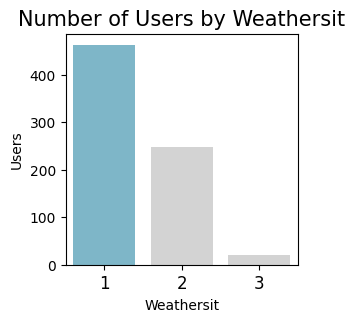

In [ ]:
byweathersit_df = cyclist_df.groupby(by="weathersit").instant.nunique().reset_index()

plt.figure(figsize=(3, 3))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="instant",
    x="weathersit",
    data=byweathersit_df.sort_values(by="instant", ascending=False),
    palette=colors
)
plt.title("Number of Users by Weathersit", loc="center", fontsize=15)
plt.ylabel("Users")
plt.xlabel("Weathersit")
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan dokumentasi dari https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset terdapat 4 kategori cuaca, berikut penjelasannya:

1.   Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
2.   Kabut + Berawan, Kabut + Awan, Kabut + Sedikit Awan, Kabut
3.   Salju Ringan, Hujan Ringan + Badai Petir + Awan, Hujan Ringan + Awan
4.   Hujan Lebat + Pecahan Es + Badai Petir + Kabut, Salju + Kabut

## Conclusion

- Kesimpulan pertanyaan 1 adalah para pengguna bike sharing lebih sering menggunakan sepeda di hari kerja atau weekday, ketimbang di hari libur atau weekend.
- Kesimpulan pertanyaan 2 adalah para pengguna bike sharing lebih sering menggunakan sepeda di cuaca yang cerah, berkabut serta hujan dan salju ringan, namun ketika hujan lebat serta badai petir tidak pernah menggunakan bike sharing.

In [ ]:
cyclist_df.to_csv("all_data.csv", index=False)